<a href="https://colab.research.google.com/github/SantiagoTangarife/Clasificaci-n-de-la-probabilidad-de-ocurrencia-de-ataque-cardiaco/blob/main/RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.utils import class_weight
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import log_loss
import random
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.python.ops.logging_ops import Print
#from keras.src.optimizers import optimizer
from tensorflow.keras.optimizers import Optimizer

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from itertools import product
import seaborn as sns
from tensorflow import keras
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")
data = df.copy()

In [ ]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
# Percentage of missing data per Features
df.isnull().mean()

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

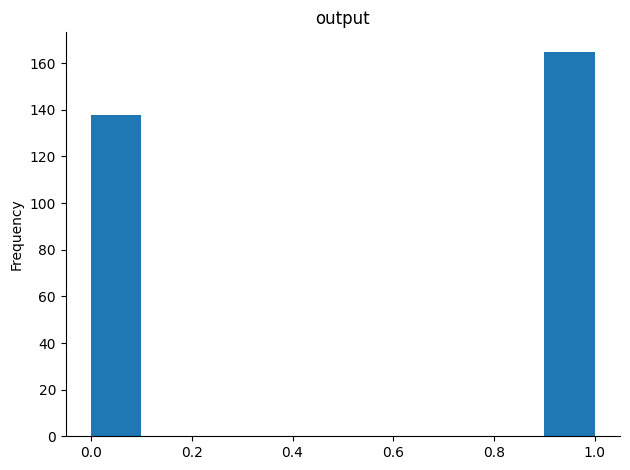

In [ ]:

data['output'].plot(kind='hist', title='output')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

#split stratyfile-->desvalance

In [ ]:
# Separa las características, en y es la salida, y en X todas menos output
y = data['output']
X = data.drop(columns=['output'])

# Kernel

In [8]:
X = df.iloc[:,:-1]
Y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [9]:
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [10]:
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy:", ("%.2f" % accuracy), "%")

Accuracy: 81.32 %


In [11]:
logloss = log_loss(y_test, y_pred)
print("Loss:", logloss)

Loss: 6.7334297540108965


In [12]:
new_svm = SVC(kernel='linear', probability=True)
scores = cross_val_score(new_svm, X_train, y_train, cv=5, scoring='neg_log_loss')

In [13]:
print("Promedio del log-loss:", -scores.mean())
print("Desviación estándar del loss:", scores.std())

Promedio del log-loss: 0.40593355126449043
Desviación estándar del loss: 0.0442608765631655


In [14]:
new_svm.fit(X_train, y_train)
y_pred = new_svm.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [15]:
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy:", ("%.2f" % accuracy), "%")

Accuracy: 81.32 %


# RNA

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=None)



In [ ]:
y_test

299    0
39     1
117    1
183    0
129    1
      ..
53     1
245    0
268    0
227    0
247    0
Name: output, Length: 61, dtype: int64

In [ ]:


# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

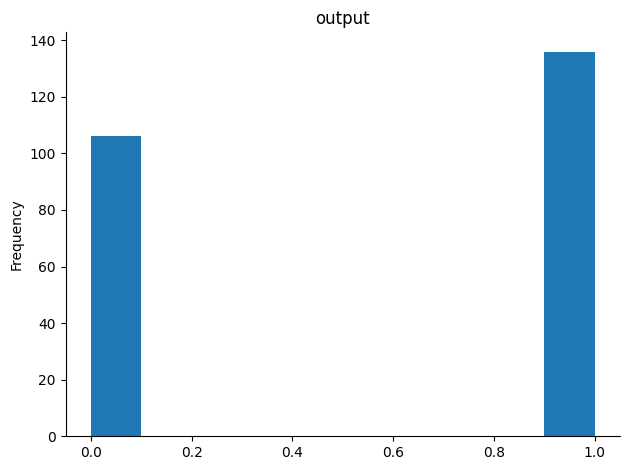

In [ ]:
y_train.plot(kind='hist', title='output')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

La red se esta entrenando...
Finalizo el entrenamiento


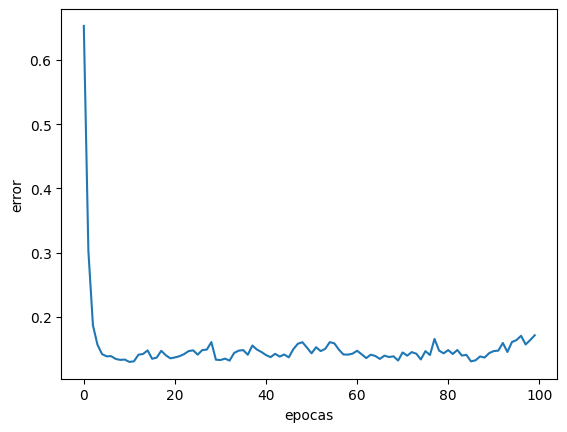

In [ ]:



# Modelo de la red neuronal
#una capa con 13 entradas, 13 neuronas en una capa interna
model = keras.Sequential([
    keras.layers.Dense(units=13, input_shape=[13])
])

#optimizador encargado de ajustar pesos en la red neuronal de a 0.1 para que se ajuste
#metrica de perdida para el seguimiento indica como va el seguimiento --> arregla grandes errores aunque sean pocos que corregir pequeños errores aunque sean muchos

# Compila el modelo
#model.compile(optimizer='sgd', loss='mean_squared_error')
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)
print("La red se esta entrenando...")
# Entrenamiento del modelo, verbose falso para mejorar la visual
entrenamiento=model.fit(X_train, y_train, epochs=100, verbose=False)
print("Finalizo el entrenamiento")

#ver el comportamiento de la red
plt.xlabel("epocas")
plt.ylabel("error")
plt.plot(entrenamiento.history["loss"])
plt.show()


## INICIO CON K-FOLD

## **EXPERIMENTO 0**

Uso **k-fold=5**  para **1, 5 y 10 capas** ocultas con ***conbinaciones*** diferentes, **13 y 26 neuronas** por capa las cuales tienen **activacion relu** y una capa de salida con **activacion sigmoid**

In [ ]:
# Configuración de capas ocultas y neuronas
hidden_layer_options = [1, 5]
neuronas=[13,26]
datos=[]
iteraciones=[10,160]
i=-1
for num_hidden_layers in hidden_layer_options:
    porcentaje=0
    i+=1
    permutations = list(product(neuronas, repeat=num_hidden_layers))
    print(f"Entrenando modelo con {num_hidden_layers} capas ocultas...")
    for z in permutations:
      if len(z)==num_hidden_layers:
        # Configurar K-Fold Cross Validation con Stratify, para 5 splits con datos mezclados, es decir mezcla antes de partir(splits)
        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        for train_index, val_index in kf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            model = keras.Sequential()
            model.add(keras.layers.Dense(units=13, input_shape=[13]))

            # Creo N capas ocultas cada una con w neuronas
            for w in z:
                model.add(keras.layers.Dense(w, activation='relu'))
            # Salida sigmoid aproxima a 0 ó 1
            model.add(keras.layers.Dense(1, activation='sigmoid'))

            # Lo mismo de arriba pero agrego la métrica de precisión
            model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error', metrics=['accuracy'])


            entrenamiento = model.fit(X_train_fold, y_train_fold, epochs=100, verbose=False)
            y_pred = model.predict(X_val_fold)

            # Evalúa la pérdida y la precisión en el conjunto de validación
            loss, accuracy = model.evaluate(X_val_fold, y_val_fold)

            porcentaje+=1
            print("=============",(porcentaje/iteraciones[i])*100,"% del progreso para",num_hidden_layers,"capas ocultas ============ \n")

            datos.append([num_hidden_layers, z, accuracy,loss])

Entrenando modelo con 1 capas ocultas...
2/2 [==============================] - 0s 8ms/step - loss: 0.1429 - accuracy: 0.8571
============= 10.0 % del progreso para 1 capas ocultas ============ 

2/2 [==============================] - 0s 7ms/step - loss: 0.2449 - accuracy: 0.7551
============= 20.0 % del progreso para 1 capas ocultas ============ 

2/2 [==============================] - 0s 8ms/step - loss: 0.1250 - accuracy: 0.8750
============= 30.0 % del progreso para 1 capas ocultas ============ 

2/2 [==============================] - 0s 8ms/step - loss: 0.2292 - accuracy: 0.7708
============= 40.0 % del progreso para 1 capas ocultas ============ 



2/2 [==============================] - 0s 10ms/step


2/2 [==============================] - 0s 24ms/step - loss: 0.1667 - accuracy: 0.8333
============= 50.0 % del progreso para 1 capas ocultas ============ 



2/2 [==============================] - 0s 16ms/step


2/2 [==============================] - 0s 10ms/step - loss: 0.1840 - accuracy: 0.8163
============= 60.0 % del progreso para 1 capas ocultas ============ 

2/2 [==============================] - 0s 9ms/step - loss: 0.2857 - accuracy: 0.7143
============= 70.0 % del progreso para 1 capas ocultas ============ 

2/2 [==============================] - 1s 17ms/step - loss: 0.1667 - accuracy: 0.8333
============= 80.0 % del progreso para 1 capas ocultas ============ 

2/2 [==============================] - 0s 11ms/step - loss: 0.1458 - accuracy: 0.8542
============= 90.0 % del progreso para 1 capas ocultas ============ 

2/2 [==============================] - 1s 12ms/step - loss: 0.2083 - accuracy: 0.7917
============= 100.0 % del progreso para 1 capas ocultas ============ 

Entrenando modelo con 5 capas ocultas...
2/2 [==============================] - 0s 9ms/step - loss: 0.5714 - accuracy: 0.4286
============= 0.625 % del progreso para 5 capas ocultas ============ 

2/2 [==================

In [ ]:
#Para 10 capas --> Ram
# Configuración de capas ocultas y neuronas
hidden_layer_options = 10
neuronas=[13,26]
iteraciones=260 #originalmente eran 5120 pero tardaba 10 horas para finalizar por ende se tomo el 5% de ese valor de forma aleatoria para reducirlo a 30 minutos aproximadamente
porcentaje=0
permutations = list(product(neuronas, repeat=10))
permutations = random.sample(permutations, 52)

print(f"Entrenando modelo con {10} capas ocultas...")
for z in permutations:
  if len(z)==10:
    # Configura K-Fold Cross Validation con Stratify
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


    for train_index, val_index in kf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model = keras.Sequential()
        model.add(keras.layers.Dense(units=13, input_shape=[13]))

        # Creo N capas ocultas cada una con 13 neuronas
        for w in z:
            model.add(keras.layers.Dense(w, activation='relu'))
        # Salida sigmoid aproxima a 0 ó 1
        model.add(keras.layers.Dense(1, activation='sigmoid'))

        # Lo mismo de arriba pero agrego la métrica de precisión
        model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error', metrics=['accuracy'])

        # Entrenamiento del modelo
        entrenamiento = model.fit(X_train_fold, y_train_fold, epochs=100, verbose=False)
        y_pred = model.predict(X_val_fold)

        # Evalúa la pérdida y la precisión en el conjunto de validación
        loss, accuracy = model.evaluate(X_val_fold, y_val_fold)

        porcentaje+=1
        print("=============",(porcentaje/iteraciones)*100,"% del progreso para",10,"capas ocultas ============ \n")

        datos.append([10, z, accuracy,loss])




52
Entrenando modelo con 10 capas ocultas...
2/2 [==============================] - 0s 10ms/step - loss: 0.4286 - accuracy: 0.5714
============= 0.38461538461538464 % del progreso para 10 capas ocultas ============ 

2/2 [==============================] - 0s 9ms/step - loss: 0.4490 - accuracy: 0.5510
============= 0.7692307692307693 % del progreso para 10 capas ocultas ============ 

2/2 [==============================] - 0s 8ms/step - loss: 0.2462 - accuracy: 0.5625
============= 1.153846153846154 % del progreso para 10 capas ocultas ============ 

2/2 [==============================] - 0s 9ms/step - loss: 0.1899 - accuracy: 0.7917
============= 1.5384615384615385 % del progreso para 10 capas ocultas ============ 

2/2 [==============================] - 0s 8ms/step - loss: 0.2467 - accuracy: 0.5625
============= 1.9230769230769231 % del progreso para 10 capas ocultas ============ 

2/2 [==============================] - 0s 8ms/step - loss: 0.4286 - accuracy: 0.5714
============= 2.307

## Resultados

In [ ]:
"""# Imprime los valores de pérdida y precisión para cada configuración de capas ocultas
for num_hidden_layers, model_info in best_models.items():
    print(f"Para el mejor modelo con : {num_hidden_layers} capas ocultas")
    print(f"Pérdida en validación: {model_info['loss']}")
    print(f"Precisión en validación: {model_info['accuracy']}")
    print(f"Con distrubucion neuronal: {model_info['distribucion']}\n")"""

In [ ]:
# Crear un DataFrame de pandas
df_E0 = pd.DataFrame(datos, columns=['Capas', 'Distribucion', 'Accuracy','Loss'])

# Imprimir la tabla
#print(df_E0)
df_sorted = df_E0.sort_values(by=df_E0.columns[3], ascending=True)

# Imprimir el DataFrame ordenado
#print(df_sorted)
capas=[10,5,1]
for i in capas:
  for index, row in df_sorted.iterrows():
        if row['Capas'] == i:
            #print(row)
            #print("para",row[0],"capas, el mejor modelo tiene",row[2],"accuracy y",row[3],"de perdida con distribucion neuronal de",row[1],"\n")
            print(f"Evaluación del mejor modelo con {row[0]} capas ocultas en datos de prueba...")
            print(f"Pérdida en datos de prueba: {row[3]}")
            print(f"Precisión en datos de prueba: {row[2]} ")
            print(f"Con distibucion: {row[1]}")
            print(f"Con K= {(index%5)+1} \n")


            break

Evaluación del mejor modelo con 10 capas ocultas en datos de prueba...
Pérdida en datos de prueba: 0.11511395126581192
Precisión en datos de prueba: 0.875 
Con distibucion: (26, 26, 13, 26, 26, 13, 26, 13, 13, 26)
Con K= 1 

Evaluación del mejor modelo con 5 capas ocultas en datos de prueba...
Pérdida en datos de prueba: 0.12090295553207397
Precisión en datos de prueba: 0.875 
Con distibucion: (26, 13, 26, 13, 13)
Con K= 4 

Evaluación del mejor modelo con 1 capas ocultas en datos de prueba...
Pérdida en datos de prueba: 0.125
Precisión en datos de prueba: 0.875 
Con distibucion: (13,)
Con K= 3 



## EXPERIMENTO 1
uso un **K-fold=5** para **1,5 y 10 capas** ocultas cada una con **13 neuronas**, las cuales tien **activacion relu**, y una capa de salida con **activacion sigmoid**

In [ ]:
# Configuración de capas ocultas y neuronas
hidden_layer_options = [1, 5, 10]
datos=[]
for num_hidden_layers in hidden_layer_options:
    print(f"Entrenando modelo con {num_hidden_layers} capas ocultas...")

    #Configurar K-Fold Cross Validation con Stratify, para 5 splits con datos mezclados, es decir mezcla antes de partir(splits)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, val_index in kf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model = keras.Sequential()
        model.add(keras.layers.Dense(units=13, input_shape=[13]))

        # Creo N capas ocultas cada una con 13 neuronas
        for _ in range(num_hidden_layers):
            model.add(keras.layers.Dense(13, activation='relu'))
        # Salida sigmoid aproxima a 0 ó 1
        model.add(keras.layers.Dense(1, activation='sigmoid'))

        # Lo mismo de arriba pero agrego la métrica de precisión
        model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error', metrics=['accuracy'])

        # Entrenamiento del modelo
        entrenamiento = model.fit(X_train_fold, y_train_fold, epochs=100, verbose=False)
        y_pred = model.predict(X_val_fold)

        # Evalúa la pérdida y la precisión en el conjunto de validación
        loss, accuracy = model.evaluate(X_val_fold, y_val_fold)
        datos.append([num_hidden_layers, 13, accuracy,loss])

# Crear un DataFrame de pandas
df_E1 = pd.DataFrame(datos, columns=['Capas', 'Distribucion', 'Accuracy','Loss'])

# Imprimir la tabla
print(df_E1)



Entrenando modelo con 1 capas ocultas...
2/2 [==============================] - 0s 8ms/step - loss: 0.3081 - accuracy: 0.6875
Entrenando modelo con 5 capas ocultas...
2/2 [==============================] - 0s 9ms/step - loss: 0.1641 - accuracy: 0.8125
Entrenando modelo con 10 capas ocultas...
2/2 [==============================] - 0s 12ms/step - loss: 0.2461 - accuracy: 0.5625
    Capas  Distribucion  Accuracy      Loss
0       1            13  0.836735  0.163263
1       1            13  0.673469  0.326529
2       1            13  0.708333  0.291667
3       1            13  0.750000  0.249168
4       1            13  0.687500  0.308104
5       5            13  0.428571  0.571429
6       5            13  0.755102  0.244898
7       5            13  0.854167  0.145100
8       5            13  0.708333  0.291667
9       5            13  0.812500  0.164088
10     10            13  0.571429  0.246497
11     10            13  0.755102  0.229498
12     10            13  0.562500  0.246467
13  

## **Resultados**

In [ ]:
df_sorted = df_E1.sort_values(by=df_E1.columns[3], ascending=True)

# Imprimir el DataFrame ordenado
#print(df_sorted)
capas=[10,5,1]
for i in capas:
  for index, row in df_sorted.iterrows():
        if row['Capas'] == i:
            #print(row)
            #print("para",row[0],"capas, el mejor modelo tiene",row[2],"accuracy y",row[3],"de perdida con distribucion neuronal de",row[1],"\n")
            print(f"Evaluación del mejor modelo con {row[0]} capas ocultas en datos de prueba...")
            print(f"Pérdida en datos de prueba: {row[3]}")
            print(f"Precisión en datos de prueba: {row[2]} ")
            print(f"Con distibucion: {row[1]}")
            print(f"Con K= {(index%5)+1} \n")

            break

Evaluación del mejor modelo con 10.0 capas ocultas en datos de prueba...
Pérdida en datos de prueba: 0.17711211740970612
Precisión en datos de prueba: 0.8125 
Con distibucion: 13.0
Con K= 4 

Evaluación del mejor modelo con 5.0 capas ocultas en datos de prueba...
Pérdida en datos de prueba: 0.14510004222393036
Precisión en datos de prueba: 0.8541666865348816 
Con distibucion: 13.0
Con K= 3 

Evaluación del mejor modelo con 1.0 capas ocultas en datos de prueba...
Pérdida en datos de prueba: 0.16326305270195007
Precisión en datos de prueba: 0.8367347121238708 
Con distibucion: 13.0
Con K= 1 

